In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification

from sklearn.linear_model import Perceptron as sk_Perceptron
from sklearn.metrics import accuracy_score as sk_accuracy_score
from sklearn.model_selection import train_test_split as sk_train_test_split

from dklearn.linear_model import Perceptron as dk_Perceptron
from dklearn.metrics import accuracy_score as dk_accuracy_score
from dklearn.model_selection import train_test_split as dk_train_test_split

In [2]:
X, y = make_classification(
    n_samples=200,
    n_features=2,
    n_informative=2,
    n_redundant=0,
    n_clusters_per_class=1,
    random_state=42
)

# Perceptron from Scikit-Learn

In [3]:
sk_X_train, sk_X_test, sk_y_train, sk_y_test = sk_train_test_split(X, y, test_size=0.2, random_state=42)

In [4]:
sk_clf = sk_Perceptron(max_iter=1000, eta0=1.0, random_state=42, tol=1e-3)
sk_clf.fit(sk_X_train, sk_y_train)

sk_y_pred = sk_clf.predict(sk_X_test)
print("Accuracy:", sk_accuracy_score(sk_y_test, sk_y_pred))

Accuracy: 0.85


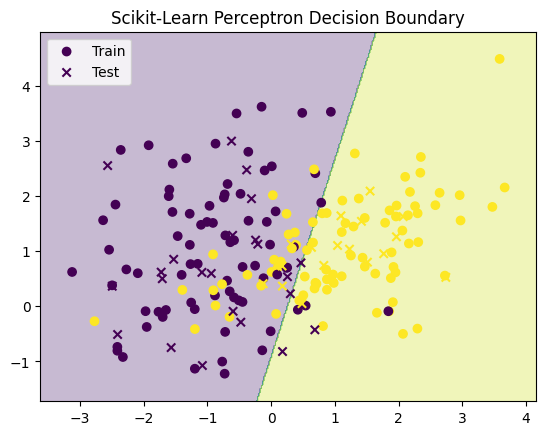

In [5]:
x_min, x_max = X[:, 0].min() - 0.5, X[:, 0].max() + 0.5
y_min, y_max = X[:, 1].min() - 0.5, X[:, 1].max() + 0.5
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02), np.arange(y_min, y_max, 0.02))

sk_Z = sk_clf.predict(np.c_[xx.ravel(), yy.ravel()])
sk_Z = sk_Z.reshape(xx.shape)

plt.contourf(xx, yy, sk_Z, alpha=0.3)
plt.scatter(sk_X_train[:, 0], sk_X_train[:, 1], c=sk_y_train, marker='o', label="Train")
plt.scatter(sk_X_test[:, 0], sk_X_test[:, 1], c=sk_y_test, marker='x', label="Test")
plt.legend()
plt.title("Scikit-Learn Perceptron Decision Boundary")
plt.show()

# Perceptron from Scratch

In [6]:
dk_X_train, dk_X_test, dk_y_train, dk_y_test = dk_train_test_split(X, y, test_size=0.2, random_state=42)

In [7]:
dk_clf = dk_Perceptron(max_iter=1000, eta0=1.0, random_state=42)
dk_clf.fit(dk_X_train, dk_y_train)

dk_y_pred = dk_clf.predict(dk_X_test)
print("Accuracy:", dk_accuracy_score(dk_y_test, dk_y_pred))

Accuracy: 0.9


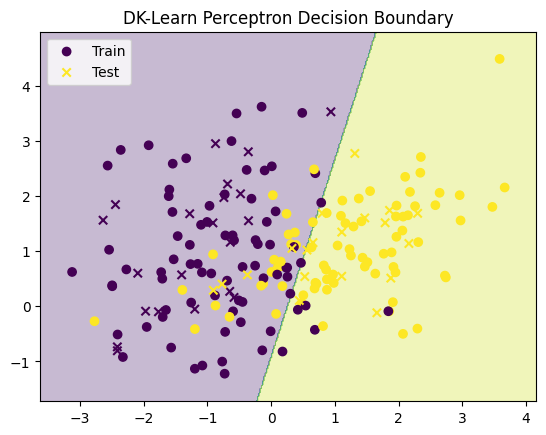

In [8]:
x_min, x_max = X[:, 0].min() - 0.5, X[:, 0].max() + 0.5
y_min, y_max = X[:, 1].min() - 0.5, X[:, 1].max() + 0.5
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02), np.arange(y_min, y_max, 0.02))

dk_Z = dk_clf.predict(np.c_[xx.ravel(), yy.ravel()])
dk_Z = dk_Z.reshape(xx.shape)

plt.contourf(xx, yy, sk_Z, alpha=0.3)
plt.scatter(dk_X_train[:, 0], dk_X_train[:, 1], c=dk_y_train, marker='o', label="Train")
plt.scatter(dk_X_test[:, 0], dk_X_test[:, 1], c=dk_y_test, marker='x', label="Test")
plt.legend()
plt.title("DK-Learn Perceptron Decision Boundary")
plt.show()

# With GridSearchCV

In [9]:
from dklearn.model_selection import GridSearchCV

In [10]:
param_grid = {
    'max_iter': [10, 100, 500, 1000],
    'eta0': [0.001, 0.01, 0.1, 1.0],
}

In [11]:
estimator = dk_Perceptron(random_state=42)

grid_cv = GridSearchCV(estimator, param_grid, cv=5, scoring='accuracy_score')

In [12]:
grid_cv.fit(dk_X_train, dk_y_train)
print("Best parameters found: ", grid_cv.get_best_params())

Best parameters found:  {'max_iter': 10, 'eta0': 0.001}


In [13]:
grid_pred = grid_cv.predict(dk_X_test)
print("Accuracy:", dk_accuracy_score(dk_y_test, dk_y_pred))

Accuracy: 0.9


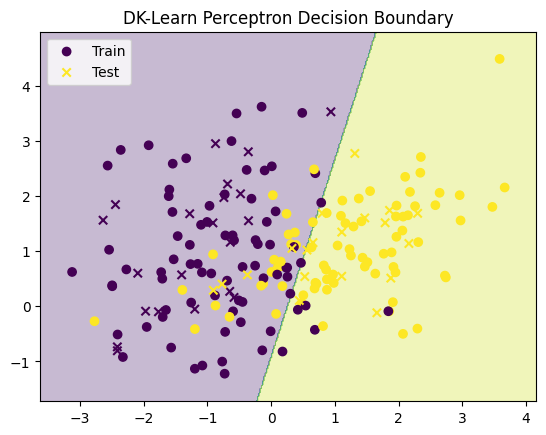

In [14]:
x_min, x_max = X[:, 0].min() - 0.5, X[:, 0].max() + 0.5
y_min, y_max = X[:, 1].min() - 0.5, X[:, 1].max() + 0.5
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02), np.arange(y_min, y_max, 0.02))

grid_Z = grid_cv.predict(np.c_[xx.ravel(), yy.ravel()])
grid_Z = grid_Z.reshape(xx.shape)

plt.contourf(xx, yy, sk_Z, alpha=0.3)
plt.scatter(dk_X_train[:, 0], dk_X_train[:, 1], c=dk_y_train, marker='o', label="Train")
plt.scatter(dk_X_test[:, 0], dk_X_test[:, 1], c=dk_y_test, marker='x', label="Test")
plt.legend()
plt.title("DK-Learn Perceptron Decision Boundary")
plt.show()